In [1]:
#A_ch02_007_DecisionTrees.ipynb
#控制決策樹的複雜度,以scikit-learn 內附威斯康辛乳癌資料集, 為範例

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [3]:
#從scikit-learn 載入資料
from sklearn.datasets import load_breast_cancer
cancerData=load_breast_cancer() #載入 breast cancer 資料,並以cancerData 指定

In [4]:
#檢視資料, Dictionary-like object
cancerData?

In [5]:
print("cancerData.keys(): \n{}".format(cancerData.keys()))

cancerData.keys(): 
dict_keys(['target_names', 'feature_names', 'data', 'target', 'DESCR'])


In [5]:
#資料列與特徵數, cancerData.data
print("cancerData.data 資料列與特徵數:{}".format(cancerData.data.shape))

cancerData.data 資料列與特徵數:(569, 30)


In [6]:
#目標值,cancerData.target, np.bincount() bins count ,Count number of occurrences of each value in array of non-negative ints
import numpy as np
print("cancerData.target , target_names:\n{}".format(
    {n: v for n,v in zip(cancerData.target_names, np.bincount(cancerData.target))}))

cancerData.target , target_names:
{'malignant': 212, 'benign': 357}


In [7]:
#準備訓練(train)與測試(test)資料集
#import train_test_split() function
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(cancerData.data,cancerData.target,
                                               stratify=cancerData.target,random_state=42)

In [8]:
#匯入 DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier

In [9]:
#建立一個 DecisionTreeClassifier object 'tree01', random_state 亂數種子
tree01=DecisionTreeClassifier(random_state=0)

In [10]:
#訓練模型, 未作任何限制, 建了一棵完全發展數,所有樹葉都是純的(pure)
treeModel01=tree01.fit(X_train,y_train)

In [13]:
treeModel01

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [14]:
#使用訓練資料集,驗證這個完全樹,treeModel01
#auc=1.0, 100%完全命中
treeModel01.score(X_train,y_train)

1.0

In [15]:
#但，改用測試資料集, auc=0.937
treeModel01.score(X_test,y_test)

0.9370629370629371

In [15]:
#以上可知，若不限制決策樹深度(不修剪),樹會變得任意深而複雜，易於過度擬合(overfitting)

In [16]:
#下例,我們以 max_depth, 限制樹的深度 (預修剪)

In [16]:
treeModel02=DecisionTreeClassifier(max_depth=4,random_state=0)
treeModel02.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [17]:
#再分別以訓練資料集及測試資料集計算auc
#訓練集不再100%,但測試集auc提高
print('Auc on trainint set:{:.3f}'.format(treeModel02.score(X_train,y_train)))
print('Auc on test set:{:.3f}'.format(treeModel02.score(X_test,y_test)))

Auc on trainint set:0.988
Auc on test set:0.951


In [19]:
#分析決策樹,以scikit-learn export_graphviz() 將樹視覺化, 存到 "tree02.dot" 檔
from sklearn.tree import export_graphviz
export_graphviz(treeModel02,out_file="tree02.dot",class_names=["malignant","benign"],
               feature_names=cancerData.feature_names,impurity=False,filled=True)

In [18]:
#檢視 "tree02.dot" 檔
import graphviz

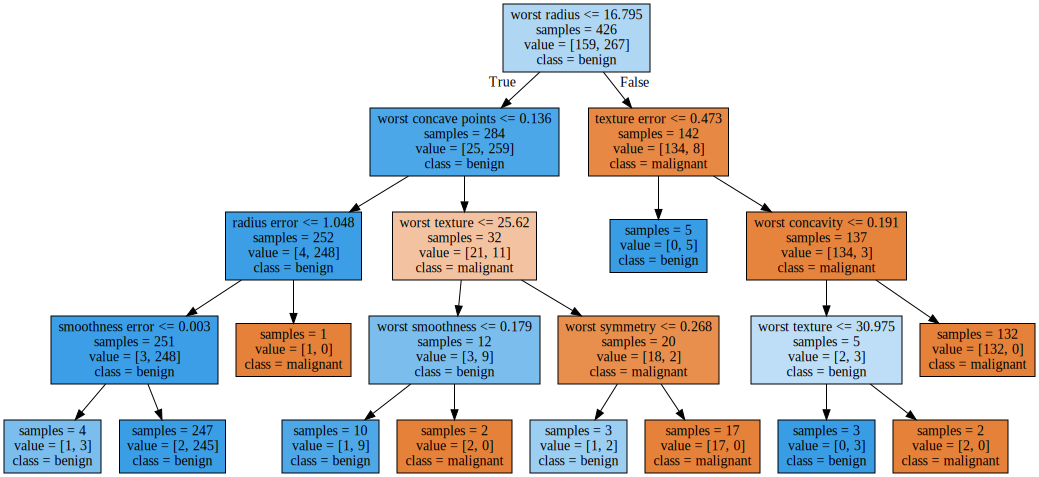

In [19]:
with open("tree02.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

In [22]:
#=================================================================================
#決策樹的「特徵重要性」

In [20]:
print("Feature importances:\n{}".format(treeModel02.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [21]:
#將 「特徵重要性」視覺化檢視 ,def function 'plot_feature_importances_cancer()'
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def plot_feature_importances_cancer(model):
    n_features=cancerData.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancerData.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

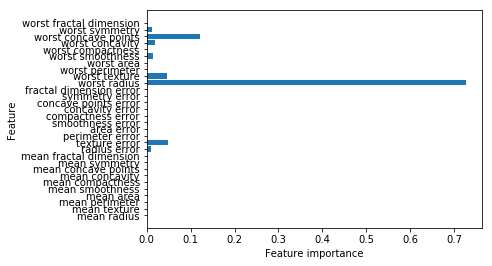

In [25]:
# 繪圖
plot_feature_importances_cancer(treeModel02)

In [26]:
#======================================================================
#隨機森林(Random forests) 實作範例(1),
#威斯康辛乳癌資料集，實作100棵樹的隨機森林

In [27]:
#step1. 準備訓練(train)與測試(test)資料集
X_train,X_test,y_train,y_test=train_test_split(cancerData.data,cancerData.target,random_state=0)

In [28]:
#step2. 載入scikit-learn 中 RandomForestClassifier module
from sklearn.ensemble import RandomForestClassifier

In [29]:
#step3. 以 RandomForestClassifier() 建立一個100棵樹的隨機森林 'forest100'
forest100=RandomForestClassifier(n_estimators=100,random_state=0)

In [30]:
#step4. 以 train dataset (X_train,y_train) fit model
forest100.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [31]:
#step5. 評估隨機森林模型
print("AUC on training set: {:.3f}".format(forest100.score(X_train,y_train)))
print("AUC on test set: {:.3f}".format(forest100.score(X_test,y_test)))

AUC on training set: 1.000
AUC on test set: 0.972


In [32]:
#step5.1 比較前面單一棵樹(預修剪)(max_depth=4) AUC
print('Auc on trainint set:{:.3f}'.format(treeModel02.score(X_train,y_train)))
print('Auc on test set:{:.3f}'.format(treeModel02.score(X_test,y_test)))

Auc on trainint set:0.979
Auc on test set:0.979


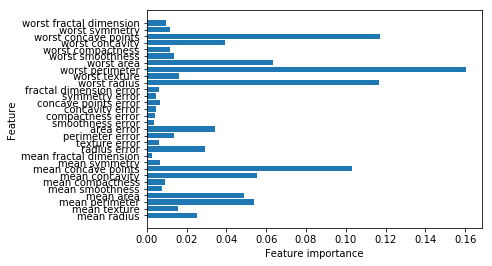

In [33]:
#step6. 檢視 forest100 「特徵重要性」
plot_feature_importances_cancer(forest100)

In [34]:
#=======================================================================
#梯度提升決策樹(Gradient Boosted Decision)實作範例
#威斯康辛乳癌資料集，實作100棵樹的GBM,max_depth=3,learn_rate=0.1

In [36]:
#step1. 準備訓練(train)與測試(test)資料集
X_train,X_test,y_train,y_test=train_test_split(cancerData.data,cancerData.target,random_state=0)

In [37]:
#step2. from sklearn import GradientBoostingClassifier module 
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
#step3. 以 GradientBoostingClassifier 建立模型 'gbrt'
gbrt=GradientBoostingClassifier(random_state=0)

In [40]:
#step4. 以 train dateset (X_train,y_train) fit
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [41]:
#step5. 評估模型
print("AUC on training set: {:.3f}".format(gbrt.score(X_train,y_train)))
print("AUC on test set: {:.3f}".format(gbrt.score(X_test,y_test)))

AUC on training set: 1.000
AUC on test set: 0.958


In [42]:
#有 overfitting 現象

In [43]:
#step6. 為降低 overfitting , 我們可以 A.限制 max_depth B.降低leaning_rate 來降低模型複雜度
#A.限制 max_depth=1 
gbrt02=GradientBoostingClassifier(random_state=0,max_depth=1)

In [44]:
gbrt02.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [46]:
#step7. 再次評估模型
print("AUC on training set: {:.3f}".format(gbrt02.score(X_train,y_train)))
print("AUC on test set: {:.3f}".format(gbrt02.score(X_test,y_test)))

AUC on training set: 0.991
AUC on test set: 0.972


In [47]:
# ovfitting 有降低

In [48]:
#step8. 為降低 overfitting , 我們可以 A.限制 max_depth B.降低leaning_rate 來降低模型複雜度
#B.降低Learning_rate=0.01 
gbrt03=GradientBoostingClassifier(random_state=0,learning_rate=0.01)

In [49]:
gbrt03.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [50]:
#step9. 再次評估模型
print("AUC on training set: {:.3f}".format(gbrt03.score(X_train,y_train)))
print("AUC on test set: {:.3f}".format(gbrt03.score(X_test,y_test)))

AUC on training set: 0.988
AUC on test set: 0.965


In [51]:
#表現沒上例好

In [56]:
#step10. 檢視梯度提升模型 「特徵重要性」 
print("Feature importances:\n{}".format(gbrt.feature_importances_))

Feature importances:
[ 0.01337291  0.04201687  0.0208666   0.01889077  0.01028091  0.03215986
  0.02074619  0.11678956  0.00820024  0.00074312  0.02042134  0.00680047
  0.02023052  0.03907398  0.05406751  0.04795741  0.02358101  0.00934718
  0.00593481  0.0239241   0.05354265  0.06160083  0.10961728  0.07395201
  0.01867851  0.03842953  0.01915824  0.07128703  0.01773659  0.00059199]


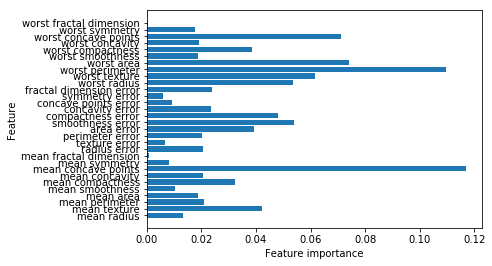

In [55]:
#step10.1 視覺化檢視梯度提升模型 「特徵重要性」
plot_feature_importances_cancer(gbrt)